# Images 1: Raster graphics

This notebook is part of [_The Joy of Jupyter_](https://github.com/mwermelinger/The-Joy-of-Jupyter), an introduction on how to use Jupyter notebooks and what can be done with them. 

This notebook shows how to read an image from a file, display and manipulate it,
and save it to a file.

I'm not a computer graphics expert. The explanations below are based on my own (possibly incorrect and definitely incomplete) understanding of how raster graphics work. 

## Introduction

A computer screen is a grid of tiny dots, called pixels (short for picture elements). 
Raster images, e.g. photos, can be represented as a matrix of numbers,
each number representing the colour of the corresponding pixel. 
The height (resp. width) of the image is the number of rows (resp. columns) of the matrix.

If each number consists of $n$ bits, then the image can use up to $2^n$ different colours.
For example, images with 1 bit per pixel can only have $2^1 = 2$ colours,
usually black and white.
Many greyscale images use 8 bits per pixel, for $2^8 = 256$ levels of grey, 
from black (represented as zero) to white (represented as 255).
Many colour images use 24 bits per pixel, for a staggering $2^{24} = 16,777,216$ colours.

In practice, instead of a single number, color images use several channels per pixel,
each channel representing one property of the pixel.

The most common scheme is RGB, which uses three channels for red, green and blue.
Each pixel is represented by a triple of 8-bit numbers (from 0 to 255) 
that indicate the intensity of red, green and blue light for each pixel.
Darkness is absence of light, so black is represented by the triple (0, 0, 0),
while white light has all colours, so it's represented by (255, 255, 255).
Grey colours are represented by other 3 equal numbers. 

There are many file formats for storing raster images, like BMP, GIF, TIFF, PNG and JPEG.
Some of them compress the image to reduce the size of the file. 

## Displaying images

Text in notebooks is written using [Markdown](https://en.wikipedia.org/wiki/Markdown)
formatting, which allows to include images between text.

For example, the next PNG image, taken from Nick Parlante's 
[Nifty Image Puzzles](http://nifty.stanford.edu/2011/parlante-image-puzzle/),
is included with the Markdown notation 

`![Random green and blue dots](iron-puzzle.png "This image hides another")`

The first text describes the image to screen readers, 
the second text is shown when hovering the mouse over the image.

![Random green and blue dots](iron-puzzle.png "This image hides another")

Markdown can be interspersed with HTML, so the same image could have been included with

`<img src="iron-puzzle.png" title="This image hides another" alt="Random green and blue dots"/>`

Using HTML one can have more control of how the image is displayed.
For more information see e.g. Mozilla's `img` tag 
[tutorial](https://developer.mozilla.org/en-US/docs/Learn/HTML/Multimedia_and_embedding/Images_in_HTML).

Images can also be displayed using IPython's `display` library. 
The next JPG image is taken from Joshua T. Guerin and Debby Keen's 
[PPM Image Editor](http://nifty.stanford.edu/2012/guerin-image-editor/) programming assignment.

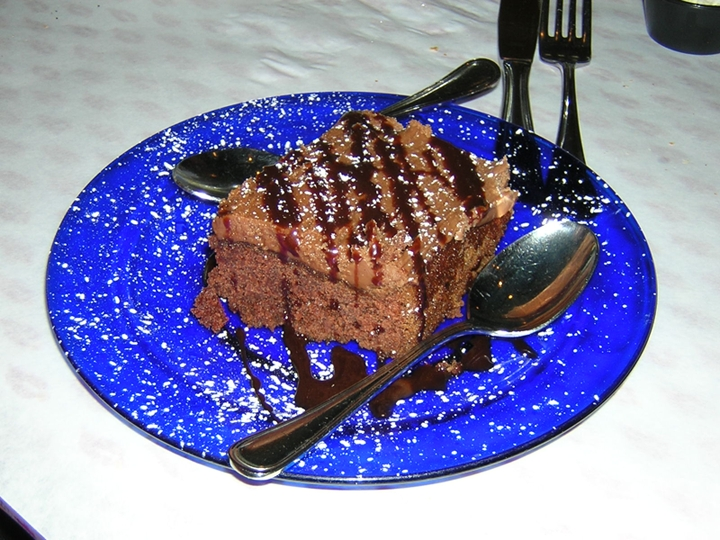

In [1]:
from IPython.display import Image

Image('cake.jpg')

The image can be resized proportionally to fit a given width.

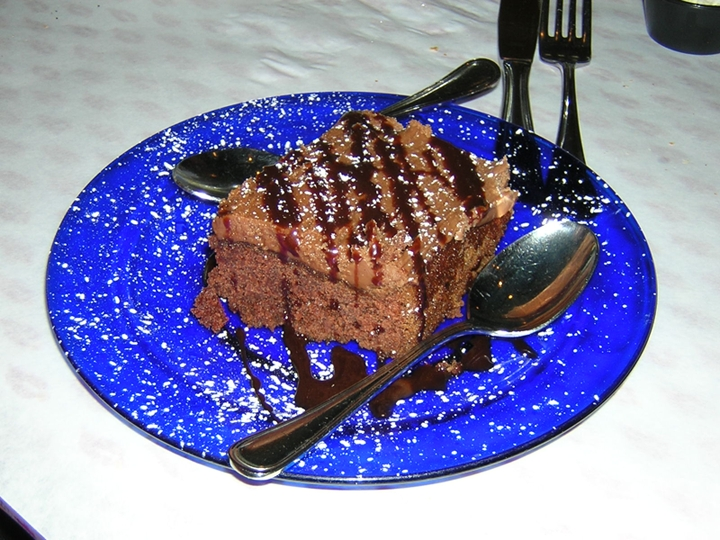

In [2]:
Image('cake.jpg', width=500)

## Converting to greyscale

The Python Image Library (PIL) provides an easy way to load an image into memory to then manipulate it pixel by pixel.

In [3]:
from PIL.Image import open

cake = open('cake.jpg')

In [4]:
cake.width

720

In [5]:
cake.height

540

In [6]:
cake.mode

'RGB'

The image is 720 pixels wide, 540 pixels high, and uses the RGB encoding of colours.

It can be converted to a greyscale image by setting the same value for the 
red, green and blue component of each pixel. 
To not change the image, the value will be the average of the 3 channels.

Each pixel is accessed through its x-y coordinates in the matrix. 
The top left pixel has coordinates (0, 0). 
The bottom right pixel has coordinates (width-1, height-1).

In [7]:
def greyscale(original):
    """Return a greyscale version of the original image, which will remain unchanged."""
    modified = original.copy() 
    for x in range(modified.width):
        for y in range(modified.height):
            (red, green, blue) = modified.getpixel((x, y))
            grey = (red + green + blue) // 3
            modified.putpixel((x, y), (grey, grey, grey))
    return modified

To display the image, it must be saved to a file first.

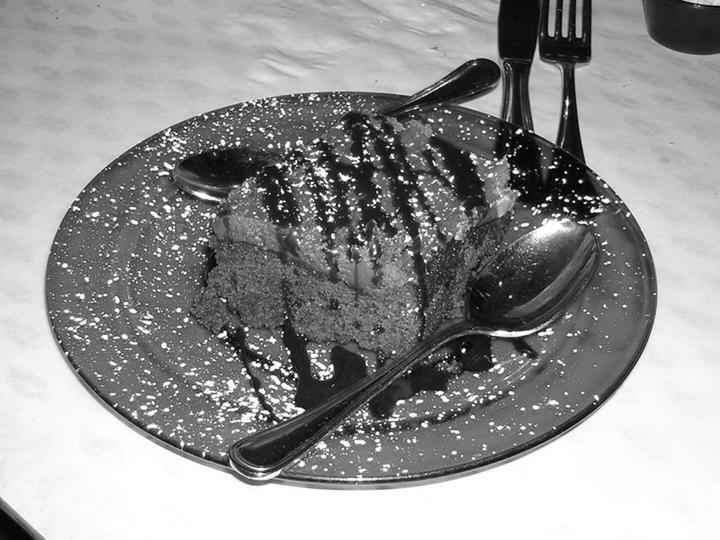

In [8]:
greyscale(cake).save('result.jpg')
Image('result.jpg', width=300)

## Green cake

Since pixels are just triples of numbers, they can be manipulated in many ways. Here is a simple one with a striking outcome for the cake image.

In [9]:
def weird(original):
    """Swap the red and green channels of the original image, which will remain unchanged."""
    modified = original.copy() 
    for x in range(modified.width):
        for y in range(modified.height):
            (red, green, blue) = modified.getpixel((x, y))
            modified.putpixel((x, y), (green, red, blue))
    return modified

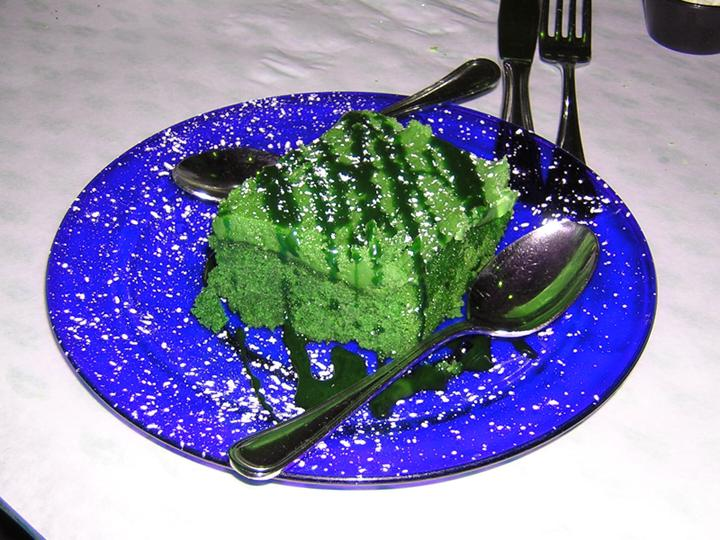

In [10]:
weird(cake).save('result.jpg')
Image('result.jpg', width=300)

If you compare with the original image further above, you notice that by switching the red and green component of each pixel:

- the blue plate remained blue;
- the light red dots on the table cloth became light green;
- the brown cake (and its reflection in the spoon) became green;
- the white table cloth and icing sugar remained white;
- the grey metallic colours and the black corners also remained the same colour.

The brown colour has a high contribution of red, and low contributions of blue and green.
So, when swapping the red and green values, the colour becomes green.

White, black and all intermediate shades of grey are represented by three equal values, 
so swapping the first and second won't change the triple.

**Activity:** Write functions that flip an image horizontally, vertically, cancel one of the colours, 'invert' the colours, increase the contrast, or blur the image. For details, see the [PPM Image Editor](http://nifty.stanford.edu/2012/guerin-image-editor/image_editor.html) assignment.

## Hiding images

Consider again the first image presented.

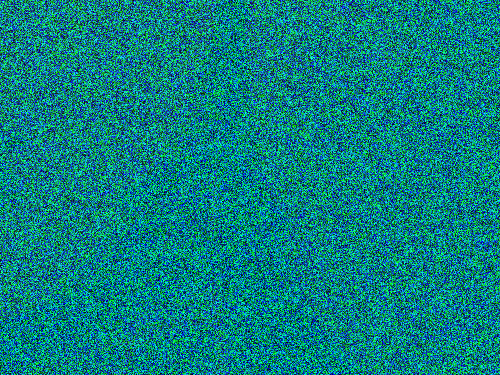

In [11]:
Image('iron-puzzle.png', width=200)

At first sight, it's just random blue and green pixels. However, its creator tells us that there is an image hidden in the red values, which have been divided by 10 so that they don't stand out.

Knowing how the image was hidden, the reverse process will reveal it:
multiply the red values by 10 and set green and blue to that value too, 
to get a greyscale image.

In [12]:
puzzle = open('iron-puzzle.png')
puzzle.mode

'RGBA'

The PNG image has a fourth channel, called the alpha channel. 
It indicates how transparent each pixel is, from 0 (completely transparent) to 255 (opaque).

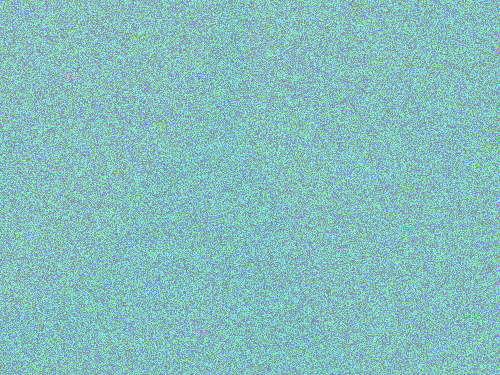

In [13]:
def transparent(original, transparency):
    """Return a copy of the 4-channel original, with the given transparency."""
    modified = original.copy() 
    for x in range(modified.width):
        for y in range(modified.height):
            (red, green, blue, alpha) = modified.getpixel((x, y))
            modified.putpixel((x, y), (red, green, blue, transparency))
    return modified

transparent(puzzle, 128).save('result.png')
Image('result.png', width=200)

Setting alpha to a middle value of 128 makes the image semi-transparent, 
letting the white background shine through.

**Activity:** Change the code above to make the image 'vanish'.

Transparency is handy when layering multiple images.
For the puzzle at hand, I will keep the value given in the file.

In [14]:
def reveal(original):
    """Return the image hidden in the 4-channel original."""
    modified = original.copy() 
    for x in range(modified.width):
        for y in range(modified.height):
            (red, green, blue, alpha) = modified.getpixel((x, y))
            grey = red * 10
            modified.putpixel((x, y), (grey, grey, grey, alpha))
    return modified

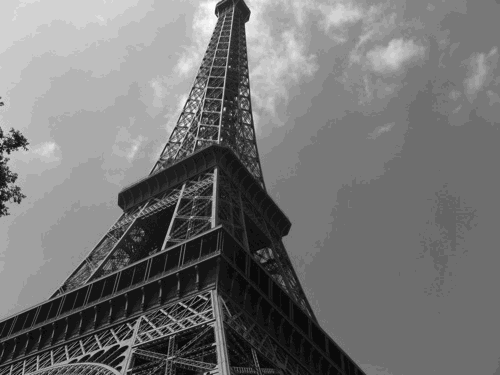

In [15]:
hidden = reveal(puzzle)
hidden.save('result.png')
Image('result.png')

The hidden image among the random blue-green dots is the Eiffel Tower! 

**Activity:** Explain why the sky looks odd. Remember that the red values had been divided by 10.

**Activity:** Solve the other 
[Nifty Image Puzzles](http://nifty.stanford.edu/2011/parlante-image-puzzle/) 
and reveal the hidden message in the 
[BMP Puzzles](http://nifty.stanford.edu/2011/malan-bmp-puzzles/).
For the latter you need to save the modified BMP file as JPEG so that
`Image()` can display it.

**Activity:** The Wikipedia article on 
[steganography](https://en.wikipedia.org/wiki/Steganography) shows (as of April 2018)
an image of a bare tree that conceals a completely different image, of a cat. Find or
devise a steganographic algorithm. Use it to hide the Eiffel Tower in the cake.

## Rotating images

Some image manipulations change the size of the image. 
For example, if an image that is $w$ pixels wide and $h$ pixels high is rotated 90°,
it becomes $h$ pixels wide and $w$ pixels high.
If the image is rotated clockwise, the original top/bottom left/right pixels

| OTL (0, 0) | OTR ($w$-1, 0) |
|-|-|
| OBL (0, $h$-1) | OBR ($w$-1, $h$-1) |

move to

| OBL (0, 0) | OTL ($h$-1, 0) |
|-|-|
| OBR (0, $w$-1) | OTR ($h$-1, $w$-1) |


With PIL one can create a blank image of a given mode and size,
and 'transfer' the pixels from the original image.

In [16]:
from PIL.Image import new

def rotate_clockwise(original):
    """Return a rotated copy of the original 4-channel image."""
    height = original.height
    width = original.width
    # create a blank image with the original dimensions swapped
    modified = new('RGBA', (height, width))
    for x in range(width):
        for y in range(height):
            pixel = original.getpixel((x, y))
            modified.putpixel((height - y - 1, x), pixel)
    return modified

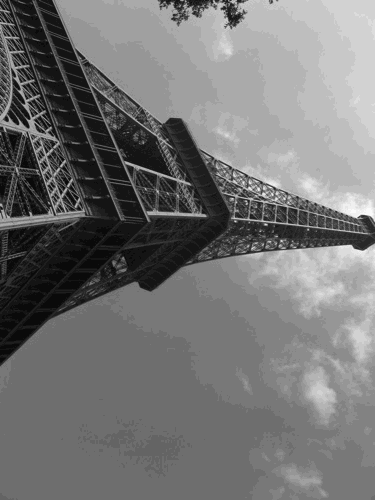

In [17]:
rotate_clockwise(hidden).save('result.png')
Image('result.png')

**Activity:** Rotate the image counter-clockwise.

**Activity:** Implement other manipulations that change the image size, e.g. cropping and resizing.